In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from datetime import datetime
import folium


In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
##lets connect our dataframe to csv file

In [47]:
df=pd.read_csv(r"C:\Users\anike\Downloads\covid_19_india.csv")

In [5]:
###calling dataFrame

In [48]:
df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [7]:
##Droping a sno colume permently by putting inpalce=true

In [49]:
df.drop(['Sno'],axis=1,inplace=True)

In [50]:
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
16845,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [51]:
#calculating total cases in india
Total_cases_over_india=df['Confirmed'].sum()
print('Total confirmed cases till now in india is =',Total_cases_over_india)

Total confirmed cases till now in india is = 4353478074


In [10]:
##to know the active cases in india lets make a new colum name as Active cases

In [52]:
df['Active cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active cases
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...
16845,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282,11455
16846,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612,3947
16847,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882,1538
16848,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818,2032


In [53]:
## If you want to find highest case value by giveing background color
##df.style.background_gradient(cmap='Reds')
## Replacing '-' value of ConfirmedIndianNational and ConfirmedForeignNational colume with '0'

df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].apply(lambda x: "0" if x == "-" else x)

df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].apply(lambda x: "0" if x == "-" else x)

df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active cases
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...
16845,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282,11455
16846,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612,3947
16847,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882,1538
16848,2021-07-07,8:00 AM,Uttar Pradesh,0,0,1682130,22656,1706818,2032


In [136]:
##if you want to see data of some perticuller colums then try this in perticular order in frame
Total_cases_in_india=df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).to_frame()
##lets give our dataframe a backgroun color 
Total_cases_in_india.style.background_gradient(cmap='Reds')


,Confirmed
State/UnionTerritory,
Maharashtra,908892470
Karnataka,387597335
Kerala,344319045
Tamil Nadu,342829697
Andhra Pradesh,324146783
Uttar Pradesh,252843682
Delhi,236972842
West Bengal,209822848
Rajasthan,128998101


In [20]:
Statewise=pd.pivot_table(df,values=['Confirmed','Deaths','Cured'],index=['State/UnionTerritory'],aggfunc=max)


In [55]:
Statewise['Recovery_Rate']=Statewise['Cured']*100/Statewise['Confirmed']

In [56]:
Statewise['Mortality_Rate']=Statewise['Deaths']*100/Statewise['Confirmed']

In [57]:
Statewise=Statewise.sort_values(by='Confirmed' ,ascending=False)

In [58]:
Statewise.style.background_gradient(cmap='Reds')

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Maharashtra,6113335,5872268,123531,96.056702,2.020681
Kerala,2996094,2877557,13960,96.043615,0.465940
Karnataka,2859595,2784030,35526,97.357493,1.242344
Tamil Nadu,2503481,2435872,33132,97.299400,1.323437
Andhra Pradesh,1908065,1861937,12898,97.582472,0.675973
Uttar Pradesh,1706818,1682130,22656,98.553566,1.327382
West Bengal,1507241,1472132,17834,97.670645,1.183222
Delhi,1434687,1408853,25001,98.199328,1.742610
Chhattisgarh,996359,977893,13462,98.146652,1.351119


# cleanining the data 
# cheacking the null value 

In [11]:
df.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Active cases                0
dtype: int64

In [17]:
####GRAPHICAL REPRATIONTION OF COVID-19 USING PANDAS BUILD IN DATA VISUATIONS ####

In [18]:
##pandas
##df.plot(kind='bar',x='State/UnionTerritory',y='Active cases')
##plt.show()
#iploty
##df.plot(kind='bar',x='State/UnionTerritory',y='Active cases')

In [19]:
## plotly libery vis

In [20]:
##plt.bar(df['State/UnionTerritory'],df['Confirmed'])

In [21]:
##px.bar(df,x='State/UnionTerritory',y='Confirmed')

In [22]:
##df.plot(kind='scatter',x='State/UnionTerritory',y='Confirmed')

In [23]:
##plt.scatter(df['State/UnionTerritory'],df['Confirmed'])

In [21]:
#plt.scatter(h['Date'],h['Confirmed'])

In [60]:
# dropping the rows which is unnessary to us mins unrelated 'Unassigned'and 'Cases being reassigned to states' this data is unrelated
df.drop(df.index[df['State/UnionTerritory'] == 'Unassigned'],axis=0,inplace=True)

In [59]:
df.drop(df.index[df['State/UnionTerritory'] == 'Cases being reassigned to states'],axis=0,inplace=True)

In [66]:
g=df.groupby('State/UnionTerritory')

In [180]:
Top_10_active_cases=df.groupby('State/UnionTerritory').max()[['Active cases','Date']].sort_values(by=['Active cases'],ascending=False).reset_index()

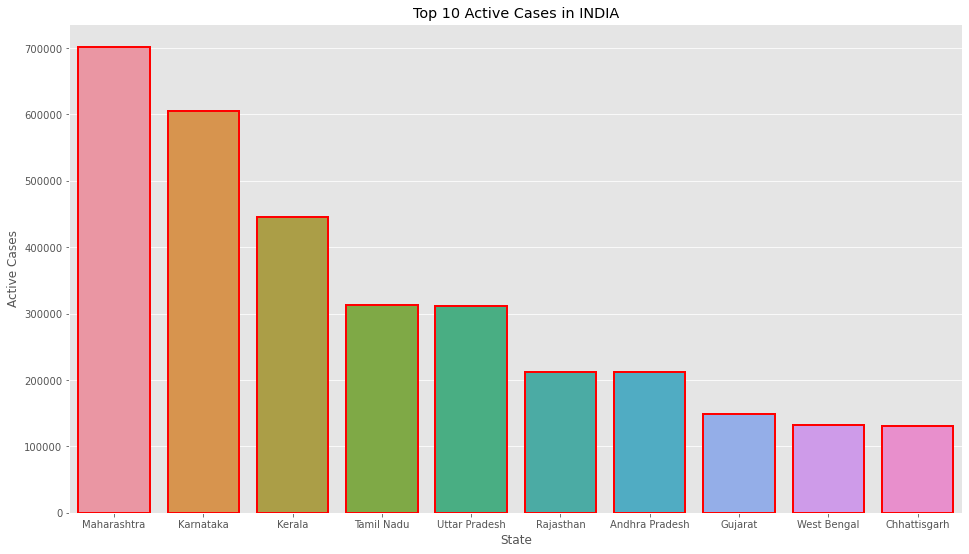

In [185]:
fig=plt.figure(figsize=(16,9))
ax=sns.barplot(data=Top_10_active_cases.iloc[:10],y='Active cases',x='State/UnionTerritory', linewidth=2 ,edgecolor='red')

plt.xlabel('State')
plt.ylabel('Active Cases')
plt.title('Top 10 Active Cases in INDIA')
plt.show()

In [170]:
Top_10_deaths=df.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()

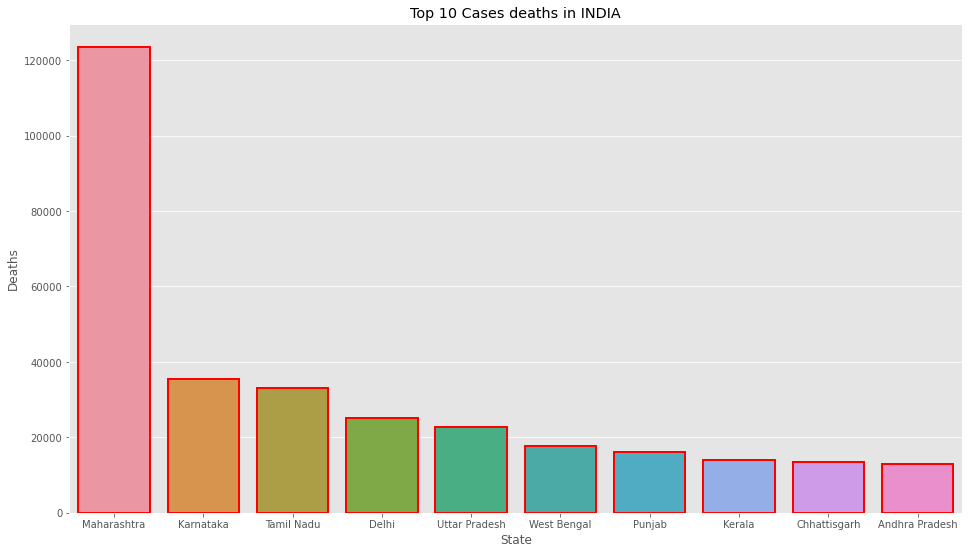

In [186]:
fig=plt.figure(figsize=(16,9))
ax=sns.barplot(data=Top_10_deaths.iloc[:10],y='Deaths',x='State/UnionTerritory', linewidth=2 ,edgecolor='red')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('Top 10 Cases deaths in INDIA')
plt.show()

Text(0.5, 1.0, 'Top 5 Affected State in India')

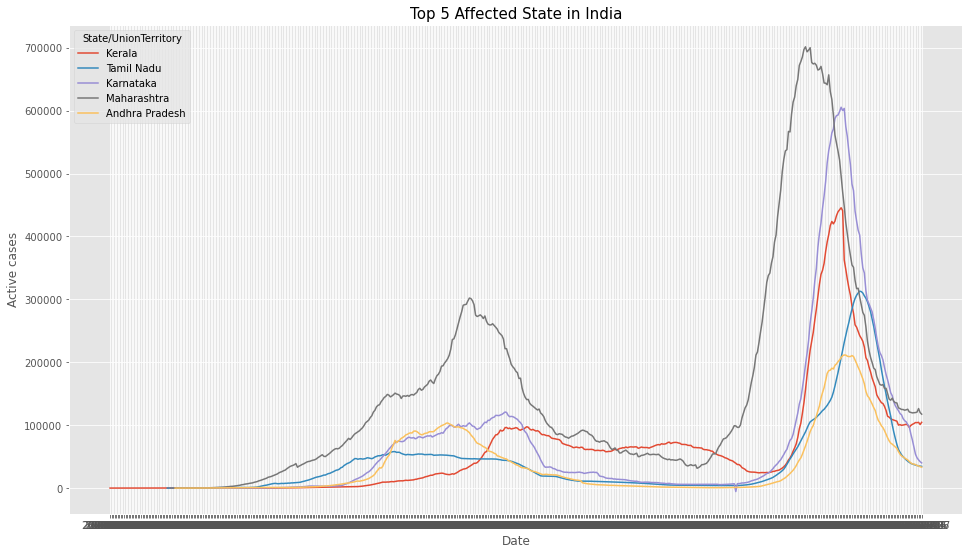

In [198]:
fig=plt.figure(figsize=(16,9))
ax= sns.lineplot(data= df[df['State/UnionTerritory'].isin(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Andhra Pradesh'])],x='Date',y ='Active cases',hue='State/UnionTerritory')
ax.set_title("Top 5 Affected State in India",size=15)

In [121]:
#Renameing the name of the state that is incorrect speelings from  'Bihar****' to 'Bihar'
df['State/UnionTerritory']=df['State/UnionTerritory'].replace(['Bihar****'],'Bihar')

In [68]:
#Renameing the name of the state that is incorrect speelings from  'Dadra and Nagar Haveli' to 'Dadra and Nagar Haveli and Daman and Diu'
df['State/UnionTerritory']=df['State/UnionTerritory'].replace(['Dadra and Nagar Haveli'],'Dadra and Nagar Haveli and Daman and Diu')

In [69]:
#Renameing the name of the state that is incorrect speelings from 'Daman & Diu'  to 'Dadra and Nagar Haveli and Daman and Diu'
df['State/UnionTerritory']=df['State/UnionTerritory'].replace(['Daman & Diu'],'Dadra and Nagar Haveli and Daman and Diu')

In [70]:
#Renameing the name of the state that is incorrect speelings from 'Telengana'  to 'Telangana'
df['State/UnionTerritory']=df['State/UnionTerritory'].replace(['Telengana'],'Telangana')


In [71]:
State=[]
k=0
for j in range (0,len(g)):
    if k<(len(g)):
        State.append(list(g)[k][0])
        k=k+1

In [210]:
dict_state=[]
k=0
for j in range (0,len(g)):
    if k<(len(g)):
        dict_state.append(list(g)[k][1])
        k=k+1

In [214]:
max_data

[             Date     Time State/UnionTerritory ConfirmedIndianNational  \
 16816  2021-07-07  8:00 AM    Arunachal Pradesh                       0   
 
       ConfirmedForeignNational  Cured  Deaths  Confirmed  Active cases  
 16816                        0  34525     181      37879          3173  ,
              Date     Time State/UnionTerritory ConfirmedIndianNational  \
 16817  2021-07-07  8:00 AM                Assam                       0   
 
       ConfirmedForeignNational   Cured  Deaths  Confirmed  Active cases  
 16817                        0  493306    4717     522267         24244  ,
              Date     Time         State/UnionTerritory  \
 16814  2021-07-07  8:00 AM  Andaman and Nicobar Islands   
 
       ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
 16814                       0                        0   7343     128   
 
        Confirmed  Active cases  
 16814       7487            16  ,
              Date     Time State/UnionTerritory Co

In [227]:
max_data0=West_Bengal.query('Confirmed == Confirmed.max()')
max_data1=Arunachal_Pradesh.query('Confirmed == Confirmed.max()')
max_data2=Assam.query('Confirmed == Confirmed.max()')
max_data3=Andaman_and_Nicobar_Islands.query('Confirmed == Confirmed.max()')
max_data4=Andhra_Pradesh.query('Confirmed == Confirmed.max()')
max_data5=Bihar.query('Confirmed == Confirmed.max()')
max_data6=Chandigarh.query('Confirmed == Confirmed.max()')
max_data7=Chhattisgarh.query('Confirmed == Confirmed.max()')
max_data8=Dadra_and_Nagar_Haveli_and_Daman_and_Diu.query('Confirmed == Confirmed.max()')
max_data9=Goa.query('Confirmed == Confirmed.max()')
max_data10=Gujarat.query('Confirmed == Confirmed.max()')
max_data11=Haryana.query('Confirmed == Confirmed.max()')
max_data12=Jammu_Kashmir.query('Confirmed == Confirmed.max()')
max_data13=Jharkhand.query('Confirmed == Confirmed.max()')
max_data14=Karnataka.query('Confirmed == Confirmed.max()')
max_data15=Himachal_Pradesh.query('Confirmed == Confirmed.max()')
max_data16=Kerala.query('Confirmed == Confirmed.max()')
max_data17=Ladakh.query('Confirmed == Confirmed.max()')
max_data18=Lakshadweep.query('Confirmed == Confirmed.max()')
max_data19=Madhya_Pradesh.query('Confirmed == Confirmed.max()')
max_data20=Maharashtra.query('Confirmed == Confirmed.max()')
max_data21=Manipur.query('Confirmed == Confirmed.max()')
max_data22=Meghalaya.query('Confirmed == Confirmed.max()')
max_data23=Mizoram.query('Confirmed == Confirmed.max()')
max_data24=Odisha.query('Confirmed == Confirmed.max()')
max_data25=Puducherry.query('Confirmed == Confirmed.max()')
max_data26=Punjab.query('Confirmed == Confirmed.max()')
max_data27=Rajasthan.query('Confirmed == Confirmed.max()')
max_data28=Tamil_Nadu.query('Confirmed == Confirmed.max()')
max_data29=Telangana.query('Confirmed == Confirmed.max()')
max_data30=Tripura.query('Confirmed == Confirmed.max()')
max_data31=Uttar_Pradesh.query('Confirmed == Confirmed.max()')
max_data32=Uttarakhand.query('Confirmed == Confirmed.max()')
max_data33=West_Bengal.query('Confirmed == Confirmed.max()')
max_data34=Delhi.query('Confirmed == Confirmed.max()')
max_data35=Nagaland.query('Confirmed == Confirmed.max()')

In [229]:
frames = [max_data0,max_data1,max_data2,max_data3,max_data4,max_data5,max_data6,max_data7,max_data8,max_data9,max_data10,
          max_data11,max_data12,max_data13,max_data14,max_data15,max_data16,max_data17,max_data18,max_data19,max_data20,
          max_data21,max_data22,max_data23,max_data24,max_data25,max_data26,max_data27,max_data28,max_data29,max_data30,
          max_data31,max_data32,max_data33,max_data34,max_data35
         ]



In [234]:
Max_Data = pd.concat(frames)

In [236]:
Max_Data.drop(['ConfirmedIndianNational'],axis=1,inplace=True)

In [237]:
Max_Data.drop(['ConfirmedForeignNational'],axis=1,inplace=True)

In [240]:
Max_Data.drop(['Time'],axis=1,inplace=True)

In [250]:
Max=Max_Data.sort_values(by=['Confirmed'],ascending=False).reset_index()

Text(0.5, 1.0, 'Hightest cases on single day of indian in all state 2021-07-07')

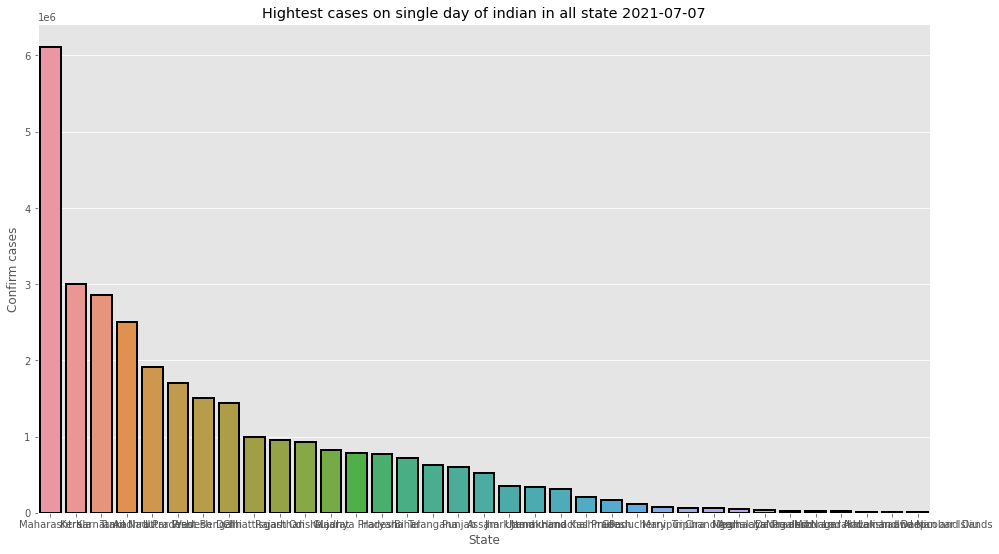

In [256]:
fig=plt.figure(figsize=(16,9))
ax=sns.barplot(data=Max,y='Confirmed',x='State/UnionTerritory', linewidth=2 ,edgecolor='Black')
plt.xlabel('State')
plt.ylabel('Confirm cases')
plt.title('Hightest cases on single day of indian in all state 2021-07-07')

In [73]:
Arunachal_Pradesh=dict_state[2]

In [74]:
Assam=dict_state[3]

In [75]:
Andaman_and_Nicobar_Islands=dict_state[0]

In [76]:
Andhra_Pradesh=dict_state[1]

In [77]:
Bihar=dict_state[4]

In [78]:
Chandigarh=dict_state[5]

In [79]:
Chhattisgarh=dict_state[6]

In [80]:
Dadra_and_Nagar_Haveli_and_Daman_and_Diu=dict_state[7]

In [81]:
Delhi=dict_state[8]

In [82]:
Goa=dict_state[9]

In [83]:
Gujarat=dict_state[10]

In [84]:
Haryana=dict_state[11]

In [85]:
Himachal_Pradesh=dict_state[12]

In [86]:
Jammu_Kashmir=dict_state[13]

In [87]:
Jharkhand=dict_state[14]

In [88]:
Karnataka=dict_state[15]

In [89]:
Kerala=dict_state[16]

In [90]:
Ladakh=dict_state[17]

In [91]:
Lakshadweep=dict_state[18]

In [92]:
Madhya_Pradesh=dict_state[19]

In [93]:
Maharashtra=dict_state[20]

In [94]:
Manipur=dict_state[21]

In [95]:
Meghalaya=dict_state[22]

In [96]:
Mizoram=dict_state[23]

In [226]:
Nagaland=dict_state[24]

In [97]:
Odisha=dict_state[25]

In [98]:
Puducherry=dict_state[26]

In [99]:
Punjab=dict_state[27]

In [100]:
Rajasthan=dict_state[28]

In [101]:
Sikkim=dict_state[29]

In [102]:
Tamil_Nadu=dict_state[30]

In [103]:
Telangana=dict_state[31]

In [104]:
Tripura=dict_state[32]

In [105]:
Uttar_Pradesh=dict_state[33]

In [106]:
Uttarakhand=dict_state[34]

In [107]:
West_Bengal=dict_state[35]


In [108]:
# just channge the name and you will see result
fig=px.bar(Delhi,x="Date",y="Confirmed",color='Confirmed',title='Confirmed cases in Delhi')
fig.show()

In [109]:
df.iplot(kind='bar',x='State/UnionTerritory',y='Confirmed')

In [110]:
#matplotly vis

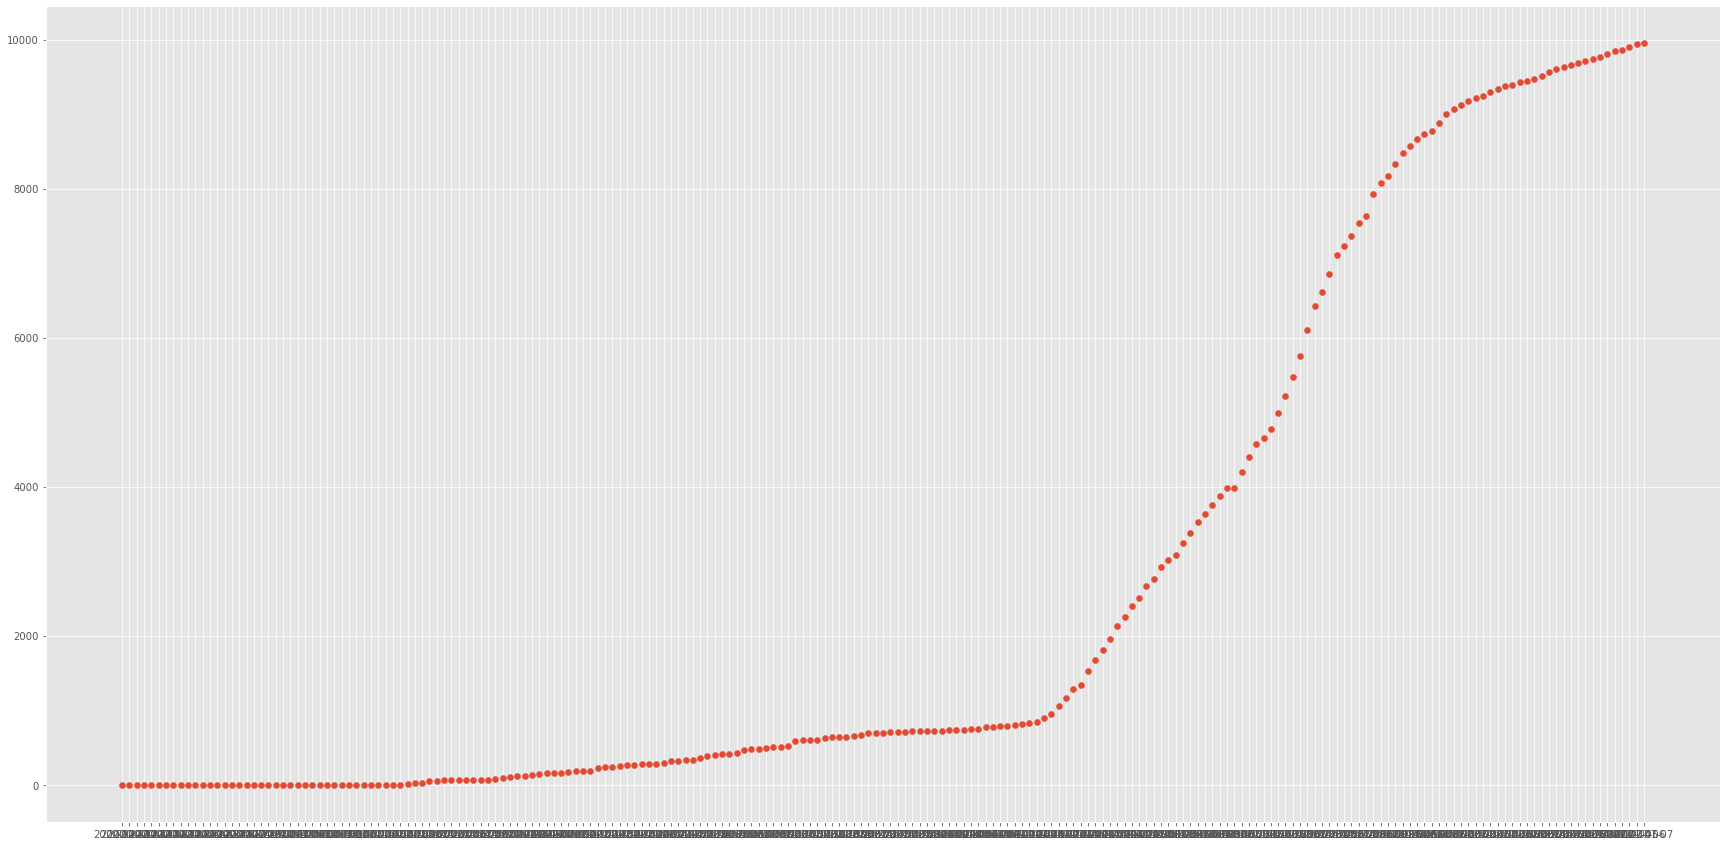

In [112]:
# justr chnage the names to draw more
plt.scatter(Lakshadweep['Date'],Lakshadweep['Confirmed'])

In [259]:
ii=1
p=[]
for i in State:
    print(ii,':',i)
    ii+=1
a=int(input("select the state number:-"))
if a<=len(State):
    p=State[a-1]
    print('here is you choice:-',p)
    ax=sns.barplot(data=(p),y='Confirmed',x='State/UnionTerritory', linewidth=2 ,edgecolor='Black')

1 : Andaman and Nicobar Islands
2 : Andhra Pradesh
3 : Arunachal Pradesh
4 : Assam
5 : Bihar
6 : Chandigarh
7 : Chhattisgarh
8 : Dadra and Nagar Haveli and Daman and Diu
9 : Delhi
10 : Goa
11 : Gujarat
12 : Haryana
13 : Himachal Pradesh
14 : Jammu and Kashmir
15 : Jharkhand
16 : Karnataka
17 : Kerala
18 : Ladakh
19 : Lakshadweep
20 : Madhya Pradesh
21 : Maharashtra
22 : Manipur
23 : Meghalaya
24 : Mizoram
25 : Nagaland
26 : Odisha
27 : Puducherry
28 : Punjab
29 : Rajasthan
30 : Sikkim
31 : Tamil Nadu
32 : Telangana
33 : Tripura
34 : Uttar Pradesh
35 : Uttarakhand
36 : West Bengal
select the state number:-5
here is you choice:- Bihar


AttributeError: 'str' object has no attribute 'get'